In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

protocol = [0,1,2,3,4,5,6,7]
# protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']
# y = np.repeat(protocol, 99, axis=None)

voluntarios = dict()
for v in range(10):
    voluntarios[v] = np.load(f'./datasets/topicosCC-processed/vol{v}-caracts.npy')

x = voluntarios[0]

# x.shape, y.shape

In [152]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(h.history[loss_list[0]]) + 1)
    print(epochs)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

In [153]:
y = np.repeat(protocol, 99, axis=None)
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape)
# print(y)

(554, 40)


In [155]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/10
70/70 [==============================] - 1s 4ms/step - loss: 78657200.0000 - accuracy: 0.1227 - val_loss: 37452084.0000 - val_accuracy: 0.0840
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 25353376.0000 - accuracy: 0.1209 - val_loss: 13730528.0000 - val_accuracy: 0.1050
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 12886115.0000 - accuracy: 0.1516 - val_loss: 8197550.5000 - val_accuracy: 0.1597
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 8447502.0000 - accuracy: 0.2310 - val_loss: 8710722.0000 - val_accuracy: 0.2059
Epoch 5/10
70/70 [==============================] - 0s 3ms/step - loss: 8343292.5000 - accuracy: 0.2292 - val_loss: 6042899.0000 - val_accuracy: 0.2395
Epoch 6/10
70/70 [==============================] - 0s 4ms/step - loss: 7765178.0000 - accuracy: 0.2437 - val_loss: 7637579.5000 - val_accuracy: 0.2269
Epoch 7/10
70/70 [==============================] - 0s 3ms/step - loss: 6416080.000

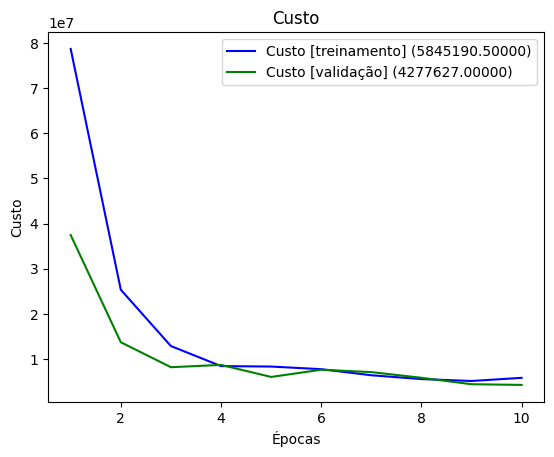

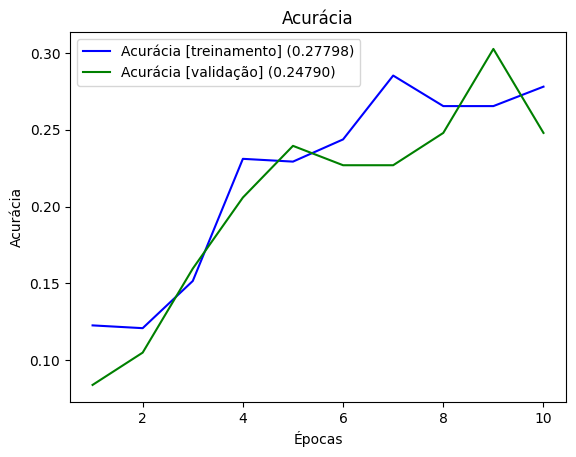

8/8 [==============================] - 0s 2ms/step - loss: 4277626.0000 - accuracy: 0.2479
Loss: 4277626.0
Accuracy: 0.2478991597890854


In [156]:
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))
plot_history(history)
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)